In [1]:
# Importing the main library
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES"
sys.path.insert(0, path )
import pygemmes as pgm

############### NOT MANDATORY BUT USEFUL ############
# Display 
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
%matplotlib widget
# Pandas display
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option("display.colheader_justify","left")
#####################################################


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

In [6]:
#pgm.get_available_fields()
#pgm.get_available_models()
pgm.get_available_plots()

,documentation,signature
Sankey,Physical and monetary Sankey diagrams,"(hub, t=0, idx=0, Region=0, figPhy=False, figMoney=False)"
Var,"One variable plot, with possibly cycles analysis and sensitivity if asked if you put [key,sectorname] it will load the specific sector if mode = 'sensitivity' the system will show statistical variance between parrallel run of nx if mode = 'cycles' the system will show cycles within the evolution of the variable with their characteristics","(hub, key, mode=False, log=False, idx=0, Region=0, tini=False, tend=False, title='')"
XY,"plot 'x' in function of 'y', the curve color being the value of 'color'.","(hub, x, y, color='time', scaled=False, idx=0, Region=0, tini=False, tend=False, title='')"
XYZ,"Plot a 3D curve, with a fourth field as the color of the curve","(hub, x, y, z, color='time', idx=0, Region=0, tini=False, tend=False, title='')"
cycles_characteristics,"Plot frequency and harmonicity for each cycle found in the system xaxis='omega',yaxis='employment',ref='employment', type1 and type2 should be in ['t_mean_cycle','period_T','medval','stdval','minval','maxval','frequency','Coeffs','Harmonicity']","(hub, xaxis='omega', yaxis='employment', ref='employment', type1='frequency', normalize=False, Region=0, title='')"
phasespace,"Depreciated, use XY instead","(hub, x, y, color='time', idx=0, Region=0)"
plot3D,"Depreciated, use XYZ instead","(hub, x, y, z, color, cmap='jet', index=0, Region=0, title='')"
plotbyunits,"generate one subfigure per set of units existing. There are three layers of filters, each of them has the same logic : if the filter is a tuple () it exclude the elements inside, if the filter is a list [] it includes the elements inside. Filters are the following : filters_units : select the units you want filters_sector : select the sector you want ( '' is all monosetorial variables) filters_sector : you can put sector names if you want them or not. '' corespond to all monosectoral variables separate_variables : key is a unit (y , y^{-1}... and value are keys from that units that will be shown on another graph, Region : is, if there a multiple regions, the one you want to plot idx : is the same for parrallel systems separate_variable : is a dictionnary, which will create a new plot with variables fron the unit selected (exemple: you have pi, epsilon and x which share the same units 'y', if you do separate_variables={'y':'x'} another figure will be added with x only on it, and pi and epsilon on the other one)","(hub, filters_key=(), filters_units=(), filters_sector=(), separate_variables={}, lw=1, idx=0, Region=0, tini=False, tend=False, title='')"
plotnyaxis,"x must be a variable name (x axis organisation) y must be a list of list of variables names (each list is a shared axis) example : pgm.plots.plotnyaxis(hub, x='time', y=[['employment', 'omega'], ['pi'], ], idx=0, title='', lw=2)","(hub, y=[[]], x='time', log=False, idx=0, Region=0, tini=False, tend=False, title='', lw=2)"
repartition,"Temporal visualisation of a composition. Recommended use on stock-flow consistency and budget repartition. Variables : * hub * keys : list of fields considered in the decomposition * sector : the sector you want to verify. Monosectoral is '' * sign : either '+','-' or a list of ['+','-'], to apply for each key. Must be a list of same length. * ref : the reference level to compare to the components. Typically in the case of debt stock-flow, ref is dotD. * title : title, * idx : number of the system in parrallel * region : number or id of the system considered * removetranspose : if there is a matrix of transaction (from i to j), add negatively the transpose of the matrix terms Will create a substack of the different component you put in. Example on a multisectoral : repartition(hub,['pi','rd','xi','gamma','omega'],sector='Consumption') repartition(hub,['pi','rd','xi','gamma','omega'],sector='Capital') Same as repartition, but will take matrices as inputs","(hub, keys: list, sector='', sign='+', 

The following fields are defined in the model but not it the library :
	- parameter: ['Delta']
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

### Identified keys to be changed ###
   Dimensions : ['Tmax']
   Fields : []
   Ignored :[]
time step 2449 / 2500
time step 2500 / 2500


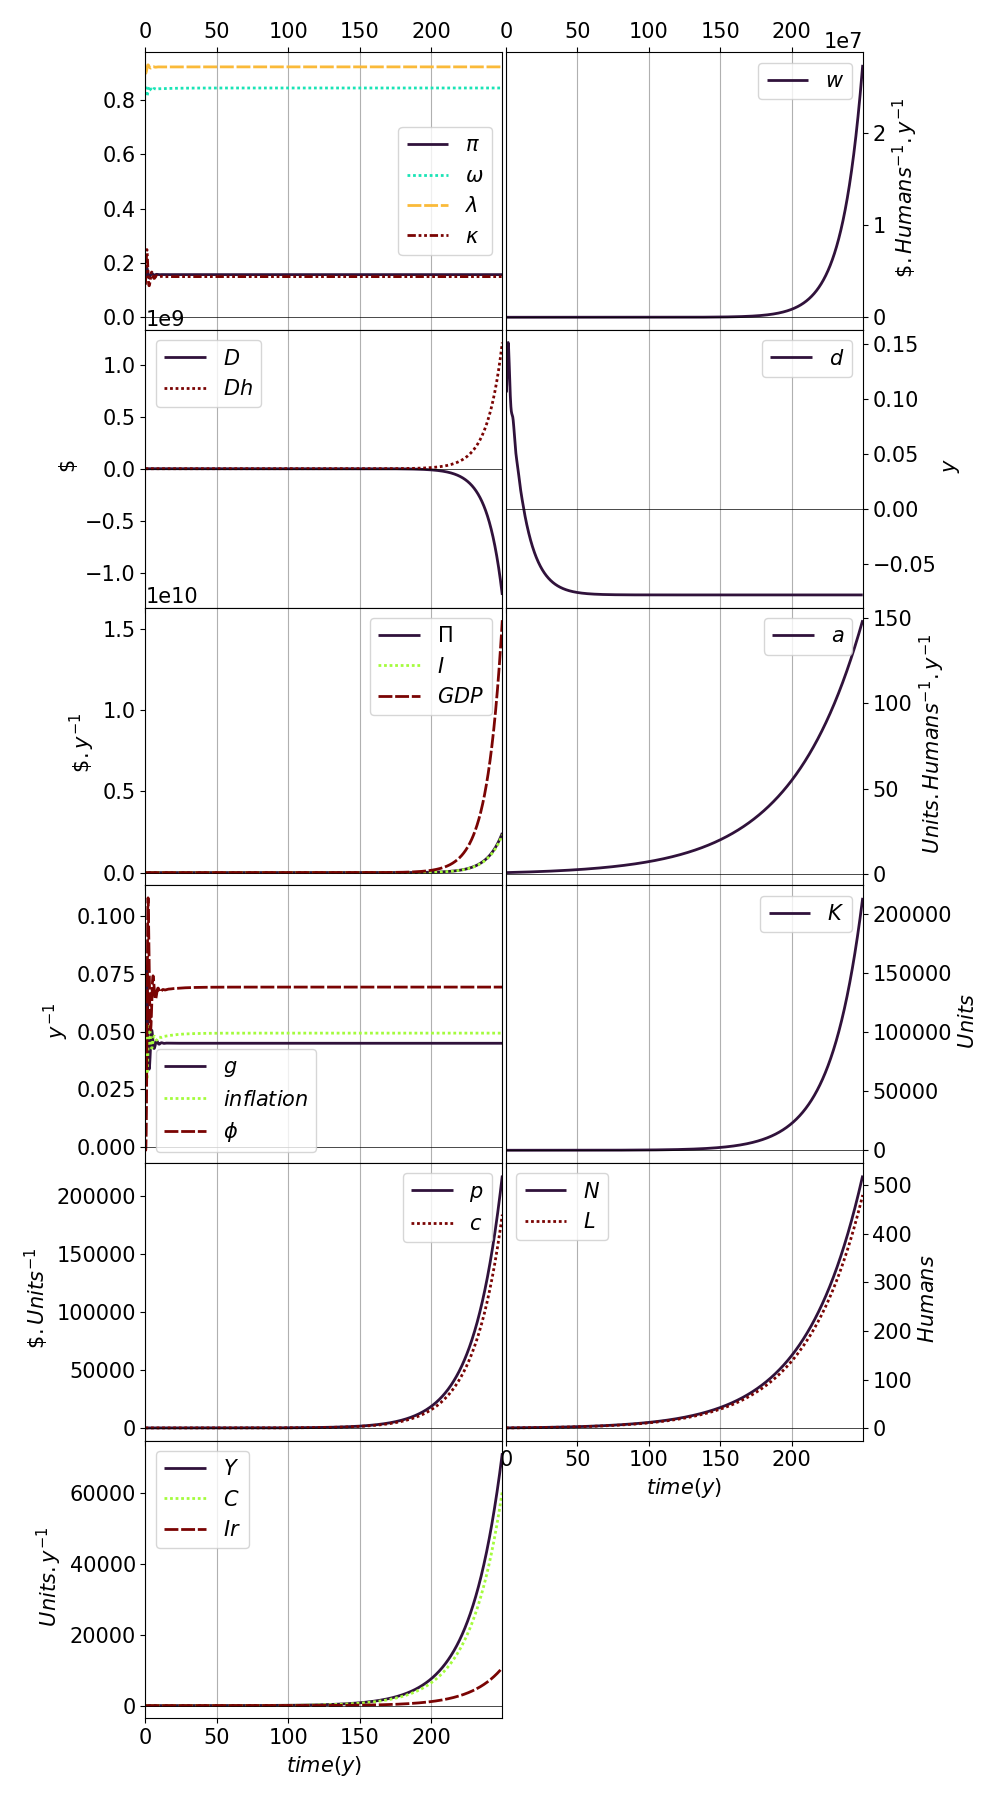

In [2]:
hub=pgm.Hub('GK_divexp')
hub.run()
hub.plot()

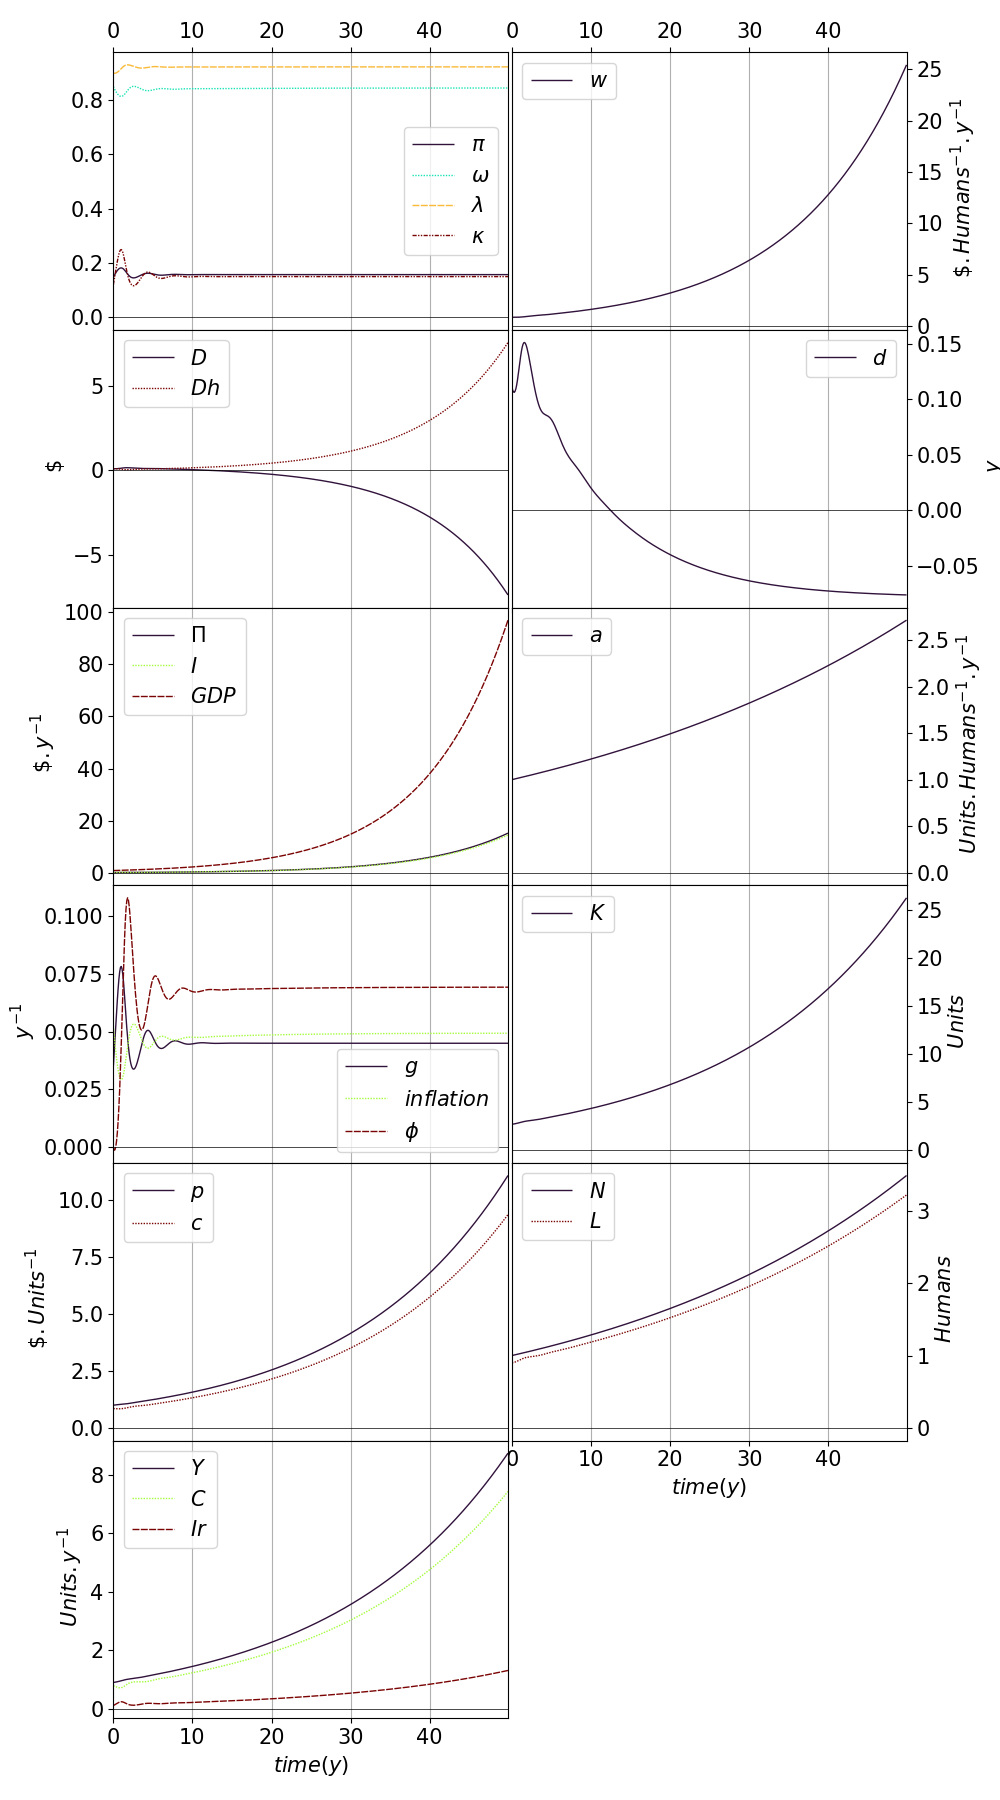

In [4]:
pgm.plots.plotbyunits(hub,tini=0,tend=50)

In [2]:
# Ipywidgets relative 
import ipywidgets as widgets
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
%matplotlib widget

def pprint(ldf):
    '''Print with newline in dataframe'''
    try : ldf = ldf.style.set_properties(**{'text-align': 'left'})
    except BaseException: pass
    return display(HTML(ldf.to_html().replace("\\n","<br>")))

# Options
default = 'GK' ## DEFAULT MODEL LOAD IN THE SYSTEM 

#### Precalculated variables 
class pre:
    def __init__(self):
        self.style = {'description_width': 'initial'}
        self.Categories = ['eqtype','source_exp','definition','com','group','units','symbol','isneeded']
        with open(path+'\\README.md', 'r') as fh: self.tutorial = fh.read()
        with open(path+'\\Tutorial-model.md', 'r') as fh: self.tutorialmodel = fh.read()
        self.figPhy= False
        self.figMoney= False
        self.AllModels = pgm.get_available_models(details=True)
        self.FULL = pgm.get_available_models(FULL=True)



hub=pgm.Hub(default,verb=False)
hub.run(verb=False)







In [3]:
### Get_summary replacement 
def get_initial(hub,eqtype=False,t0=False,t1=False,): 
    R0=hub.get_dparam()
    if eqtype==False: R= R0
    else: R= hub.get_dparam(eqtype=eqtype)

    time = R0['time']['value'][:,0,0,0,0]
    if np.isnan(time[1]): 
        idt0=0
        idt1=1
    else:
        if type(t0) in [int,float] : idt0=np.argmin(np.abs(time-t0))
        else : idt0=0

        if type(t0) in [int,float]: idt1=np.argmin(np.abs(time-t1))+1
        else : idt1=-1


    SectsX= R0['nx']['list']
    SectsR= R0['nr']['list']
    Time = R0['time']['value'][idt0:idt1,0,0,0,0]
    Onedict={ 'field':  [],
            'value': []    ,
            'time': [],
            'parrallel': [],
            'region': [],
            'Multi1':[],
            'Multi2':[],
                }
    Bigdict={}
    for k in R.keys():
        if R[k].get('eqtype',None) not in ['parameter','parameters',None,'size']:
            GRID = np.meshgrid( 
                                R0[R[k]['size'][1]].get('list',['mono']),
                                R0[R[k]['size'][0]].get('list',['mono']),
                                SectsR,
                                SectsX,
                                Time
                                )
        else : 
            GRID = np.meshgrid( 
                                R0[R[k]['size'][1]].get('list',['mono']),
                                R0[R[k]['size'][0]].get('list',['mono']),
                                SectsR,
                                SectsX,
                                [0.]
                                )
        Val = R[k]['value'][idt0:idt1,...] if R[k].get('eqtype',None) not in ['parameter','parameters',None,'size'] else R[k]['value']
        if type(Val) in [float,int]: 
            Val=np.array([Val])
        Val= Val.reshape(-1)
        Onedict['field'    ].extend([k for i in GRID[-1].reshape(-1)])
        Onedict['value'    ].extend(Val)
        Onedict['time'     ].extend(GRID[-1].reshape(-1))
        Onedict['parrallel'].extend(GRID[-2].reshape(-1))
        Onedict['region'   ].extend(GRID[-3].reshape(-1))
        Onedict['Multi1'   ].extend(GRID[-4].reshape(-1))
        Onedict['Multi2'   ].extend(GRID[-5].reshape(-1))
    df=pd.DataFrame(Onedict).set_index(['parrallel','region','field','Multi1','Multi2','time'],drop=True).unstack().transpose()    
    return df


# TAB EXPLORATION / LOAD 
def get_Exploration0(hub):
    '''General tutorial on pygemmes'''
    for _ in range(1): # first line : description 
        ### Widget declaration 
        ShowPygemmes  = widgets.Button(description='Pygemmes description',style=pre.style)
        ShowModels    = widgets.Button(description='Model list',style=pre.style)
        ShowFields    = widgets.Button(description='Fields list',style=pre.style)
        ShowFunctions = widgets.Button(description='Functions list',style=pre.style)
        ShowPlots     = widgets.Button(description='Plots list',style=pre.style)
        ShowUse       = widgets.Button(description='Use Tutorial',style=pre.style)
        ShowWriting   = widgets.Button(description='Model Tutorial',style=pre.style)
        ShowClear     = widgets.Button(description='Clear',style=pre.style)
        ShowOut = widgets.Output()

        ### Widget Functions 
        def ShowPygemmes_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                print(pgm.__doc__)
        ShowPygemmes.on_click(ShowPygemmes_event)
        def ShowModels_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                pprint(pgm.get_available_models(details=True))
        ShowModels.on_click(ShowModels_event)
        def ShowFields_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                pprint(pgm.get_available_fields(exploreModels=True))
        ShowFields.on_click(ShowFields_event)
        def ShowFunctions_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                pprint(pgm.get_available_functions())
        ShowFunctions.on_click(ShowFunctions_event)
        def ShowPlots_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                pprint(pgm.get_available_plots())
        ShowPlots.on_click(ShowPlots_event)
        def ShowClear_event(obj):
            with ShowOut:
                ShowOut.clear_output()
        ShowClear.on_click(ShowClear_event)
        def ShowUse_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                display(Markdown(pre.tutorial))
        ShowUse.on_click(ShowUse_event)
        def ShowWriting_event(obj):
            with ShowOut:
                ShowOut.clear_output()
                display(Markdown(pre.tutorialmodel))
        ShowWriting.on_click(ShowWriting_event)
        
    return widgets.VBox([widgets.HBox([ShowPygemmes,ShowModels,ShowFields,ShowFunctions,ShowPlots,ShowUse,ShowWriting]),
                                    ShowOut])


def get_Loading(hub):
    '''Loading model'''
    ### Widget declaration  
    Loaddropdown = widgets.Dropdown(options=list(AllModels.index),value=hub.dmodel['name'],description='Model file :')
    Loadpresets = widgets.Dropdown(options=[None]+AllModels.loc[hub.dmodel['name']].loc['Preset'], description='Preset :')
    Loadout = widgets.Output()
    createhub = widgets.Button(description='LOAD !')

    def valuechange(change):
        Loadpresets.options = [None]+AllModels.loc[change['new']].loc['Preset']
        with Loadout:
            Loadout.clear_output()
            display(Markdown('# Model: '+FULL.loc[change['new']].loc['name']))
            display(Markdown(FULL.loc[change['new']].loc['description']))
            display(Markdown(FULL.loc[change['new']].loc['address']))
            if FULL.loc[change['new']].loc['description'] != FULL.loc[change['new']].loc['longDescription']:
                display(Markdown(FULL.loc[change['new']].loc['longDescription']))
            display(Markdown('# Presets'))
            display(pd.DataFrame(pd.DataFrame(FULL.loc[change['new']].loc['presets']).transpose()['com']))
            display(Markdown('# Supplements'))
            display(FULL.loc[change['new']].loc['supplements'])
    Loaddropdown.observe(valuechange, names='value')

    def createhub_event(obj):
        global hub
        with Loadout:
            hub= pgm.Hub(Loaddropdown.value,preset=Loadpresets.value,verb=True)
    createhub.on_click(createhub_event)
    return widgets.VBox([widgets.HBox([Loaddropdown,Loadpresets,createhub]),Loadout])


def set_value(hub):     
    vardrop = widgets.Dropdown(options=list(set(hub.dmisc['dfunc_order']['parameters']
                        +hub.dmisc['dfunc_order']['differential'])
                        -set(['__ONE__','dt'])),value=list(set(hub.dmisc['dfunc_order']['parameters']
                        +hub.dmisc['dfunc_order']['differential'])
                        -set(['__ONE__','dt']))[0],description='Field to change :',style=pre.style)

    Parrallel2 = widgets.Dropdown(
        options=hub.dparam['nx']['list'],
        value=hub.dparam['nx']['list'][0],
        description='parrallel:',
        continuous_update=True
    ) 
    Region2 = widgets.Dropdown(
        options=hub.dparam['nr']['list'],
        value=hub.dparam['nr']['list'][0],
        description='Region:',
        continuous_update=True
    ) 
    Multi1 = widgets.Dropdown(
        options=hub.dparam[hub.dparam[vardrop.value]['size'][0]]['list'],
        value=hub.dparam[hub.dparam[vardrop.value]['size'][0]]['list'][0],
        description='Multi1:',
        continuous_update=True
    ) 
    Multi2 = widgets.Dropdown(
        options=hub.dparam[hub.dparam[vardrop.value]['size'][1]]['list'],
        value=hub.dparam[hub.dparam[vardrop.value]['size'][1]]['list'][0],
        description='Multi2:',
        continuous_update=True
    ) 

    def update_multi1(*args):
        Multi1.options = hub.dparam[hub.dparam[vardrop.value]['size'][0]]['list']
    def update_multi2(*args):
        Multi2.options = hub.dparam[hub.dparam[vardrop.value]['size'][1]]['list']
    vardrop.observe(update_multi1, 'value')
    vardrop.observe(update_multi2, 'value')

    def setval(vardrop,Parrallel2,Region2,Multi1,Multi2):
        IndP = hub.dparam['nx']['list'].index(Parrallel2.value)
        IndR = hub.dparam['nr']['list'].index(Region2.value)
        IndM1= hub.dparam[hub.dparam[vardrop.value]['size'][0]]['list'].index(Multi1.value)
        IndM2= hub.dparam[hub.dparam[vardrop.value]['size'][1]]['list'].index(Multi2.value)
        val = str(hub.dparam[vardrop.value]['value'][0,IndP,IndR,IndM1,IndM2]) if vardrop.value in hub.dmisc['dfunc_order']['differential'] else (str(hub.dparam[vardrop.value]['value'][  IndP,IndR,IndM1,IndM2]) if hub.dparam[vardrop.value]['group']!='Numerical' 
            else  str(hub.dparam[vardrop.value]['value']))
        return val

    setvalue =  widgets.FloatText(
        value=  setval(vardrop,Parrallel2,Region2,Multi1,Multi2) ,
        description='Set value:',
    ) 
    def update_val(*args): setvalue.value = setval(vardrop,Parrallel2,Region2,Multi1,Multi2)
    vardrop.observe(update_val,'value')
    Multi1.observe(update_val,'value')
    Multi2.observe(update_val,'value')


    clickset = widgets.Button(description='Set !')
    def clickset_event(obj):
        hub.set_dparam(vardrop.value,[Parrallel2,Region2, Multi1,Multi2,float(setvalue.value)] )
    clickset.on_click(clickset_event)           

    return widgets.VBox([widgets.HBox([vardrop,setvalue,clickset]),Parrallel2,Region2,Multi1,Multi2,])


# Network
def get_network(hub):
    createNetwork = widgets.Button(description='Create Network')
    dropdownP = widgets.Dropdown(options=[True,False],value=True,description='Show parameters :',style=pre.style)
    dropdownA = widgets.Dropdown(options=[True,False],value=True,description='Show Auxilliary :',style=pre.style)
    outnet= widgets.Output()

    def createNetwork_event(obj):
        hub.get_Network(params=dropdownP.value,auxilliary=dropdownA)  
    createNetwork.on_click(createNetwork_event)

    viewFields = widgets.Button(description='view Fields')
    viewValues = widgets.Button(description='view Values')

    return widgets.HBox([dropdownP,dropdownA,createNetwork])


# Type Summary 
def get_introspect(hub): 
    clicksummary = widgets.Button(description='get summary')
    clickFields =widgets.Button(description='get Fields')
    dropdownCAT = widgets.Dropdown(options=pre.Categories,value='eqtype',description='Sorting :')
    outINTROS = widgets.Output()

    def clicksummary_event(obj):
        with outINTROS:
            
            outINTROS.clear_output()
            hub.get_summary()
    clicksummary.on_click(clicksummary_event)

    def clickFields_event(obj):
        with outINTROS:
            outINTROS.clear_output()
            R=hub.get_dparam()
            Rpandas= {k0:{k:R[k0][k] for k,v in R[k0].items() if k in pre.Categories} for k0 in R.keys()}
            AllFields=pd.DataFrame(Rpandas,index=pre.Categories).transpose().sort_values(by=[dropdownCAT.value])
            pprint(AllFields.replace(np.nan,''))
    clickFields.on_click(clickFields_event)

    return widgets.VBox([widgets.HBox([dropdownCAT,clickFields]),outINTROS])


# Values summary
def get_value(hub):
        #ValueFrame = pd.DataFrame()
        clickValues = widgets.Button(description='get values')
        
        TimeSlider = widgets.FloatRangeSlider(
                value=[hub.dparam['time']['value'][0,0,0,0,0], hub.dparam['dt']['value']],
                min=hub.dparam['time']['value'][0,0,0,0,0],
                max=hub.dparam['Tmax']['value'],
                step=hub.dparam['dt']['value'],
                description='Time range:',
                disabled=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',
                continuous_update=True
            ) 

        Out1 = widgets.Output()
        Out2 = widgets.Output()
        Out3 = widgets.Output()

        def showValues(): 
            dfp = get_initial(hub,eqtype=None,t0=0,t1=0,)
            dfd = get_initial(hub,eqtype='differential',t0=TimeSlider.value[0],t1=TimeSlider.value[1],)
            dfs = get_initial(hub,eqtype='statevar'    ,t0=TimeSlider.value[0],t1=TimeSlider.value[1],)
            Out1.clear_output()
            Out2.clear_output()
            Out3.clear_output()
            with Out1: 
                display(Markdown('<p style="text-align: center;">'+' Parameters '+'</p>'))
                pprint(dfp.transpose())
            with Out2: 
                display(Markdown('<p style="text-align: center;">'+' Differential variables '+'</p>'))
                pprint(dfd.transpose())
            with Out3: 
                display(Markdown('<p style="text-align: center;">'+' State Variables '+'</p>'))
                pprint(dfs.transpose())

        def clickValues_event(obj):
            pass
            showValues()
        clickValues.on_click(clickValues_event)
        #showValues()
        
  
        return widgets.VBox([widgets.HBox([clickValues,TimeSlider]), widgets.HBox([Out1,Out2,Out3])])


# RUN 
def get_run(hub):
    clickrun = widgets.Button(description='RUN!')
    outrun = widgets.Output()
    def clickrun_event(obj):
        global hub
        with outrun:
            hub.run()
    clickrun.on_click(clickrun_event)

    setReinterp =  widgets.FloatText(
    value=hub.dparam['nt']['value'],
    description='Reinterpolate on:',style=pre.style)

    #  Set  
    clickset = widgets.Button(description='Set !')
    def clickset_event(obj):
        hub.reinterpolate_dparam(int(setReinterp.value))
        with outrun:
            print("reinterpolated")
    clickset.on_click(clickset_event)

    return widgets.VBox([clickrun,widgets.HBox([setReinterp,clickset]),outrun])


# TAB PLOTS
def get_plot(hub,figPhy,figMoney):
    ########### PRESETS ############## 
    Outplot=widgets.Output()
    B1 = widgets.Button(description='Presets',style=pre.style)
    def B1e(obj): 
        with Outplot: 
            Outplot.clear_output(); 
            hub.plot_preset()
    B1.on_click(B1e)

    ########### ONE VARIABLE ########
    def PLOToneVariable(hub): 
        TimeSlider = widgets.FloatRangeSlider(
                value=[hub.dparam['time']['value'][0,0,0,0,0], hub.dparam['Tmax']['value']],
                min=hub.dparam['time']['value'][0,0,0,0,0],
                max=hub.dparam['Tmax']['value'],
                step=hub.dparam['dt']['value'],
                description='Time range:',
                disabled=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',
                continuous_update=True
            ) 
        Parrallel = widgets.Dropdown(
            options=hub.dparam['nx']['list'],
            value=hub.dparam['nx']['list'][0],
            description='parrallel :',
            continuous_update=True
        ) 
        Region = widgets.Dropdown(
            options=hub.dparam['nr']['list'],
            value=hub.dparam['nr']['list'][0],
            description='Region :',
            continuous_update=True
        ) 
        Scaling = widgets.Dropdown(
            options=[True,False],
            value = False,
            description='Scaling axes'
        )
        outPLOT = widgets.Output()
        Plotvars = hub.dmisc['dfunc_order']['statevar']+hub.dmisc['dfunc_order']['differential']
        varXdrop = widgets.Dropdown(options=Plotvars,value='time',description='X axis :')
        varYdrop = widgets.Dropdown(options=Plotvars,value='time',description='Y axis :')
        varCdrop = widgets.Dropdown(options=Plotvars,value='time',description='color :')

        clickplot = widgets.Button(description='Plot !')
        def clickplot_event(obj):
            with outPLOT:
                pgm.plots.XY(hub,x=varXdrop.value,
                                    y=varYdrop.value,
                                    color = varCdrop.value,
                                    idx=Parrallel.value,
                                    Region=Region.value,
                                    tini=TimeSlider.value[0],
                                    tend=TimeSlider.value[1],
                                    scaled=Scaling.value)
        clickplot.on_click(clickplot_event)

        clickclear = widgets.Button(description='clear')
        def clickclear_event(obj):
            with outPLOT:
                #plt.close('all')
                outPLOT.clear_output()
        clickclear.on_click(clickclear_event)

        return widgets.VBox([widgets.HBox([TimeSlider,Parrallel,Region]),
                                widgets.HBox([varXdrop,varYdrop,varCdrop]),
                                widgets.HBox([Scaling,clickplot,clickclear]),outPLOT])    

    def Plot3D(hub):
        TimeSlider = widgets.FloatRangeSlider(
                value=[hub.dparam['time']['value'][0,0,0,0,0], hub.dparam['Tmax']['value']],
                min=hub.dparam['time']['value'][0,0,0,0,0],
                max=hub.dparam['Tmax']['value'],
                step=hub.dparam['dt']['value'],
                description='Time range:',
                disabled=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',
                continuous_update=True
            ) 
        Parrallel = widgets.Dropdown(
            options=hub.dparam['nx']['list'],
            value=hub.dparam['nx']['list'][0],
            description='parrallel :',
            continuous_update=True
        ) 
        Region = widgets.Dropdown(
            options=hub.dparam['nr']['list'],
            value=hub.dparam['nr']['list'][0],
            description='Region :',
            continuous_update=True
        ) 
        outPLOT = widgets.Output()
        Plotvars = hub.dmisc['dfunc_order']['statevar']+hub.dmisc['dfunc_order']['differential']
        varXdrop = widgets.Dropdown(options=Plotvars,value='time',description='X axis:')
        varYdrop = widgets.Dropdown(options=Plotvars,value='time',description='Y axis:')
        varZdrop = widgets.Dropdown(options=Plotvars,value='time',description='Z axis:')
        varCdrop = widgets.Dropdown(options=Plotvars,value='time',description='color:')

        clickplot = widgets.Button(description='Plot !')
        def clickplot_event(obj):
            with outPLOT:
                pgm.plots.XYZ(hub,x=varXdrop.value,
                                  y=varYdrop.value,
                                  z=varZdrop.value,
                                  color = varCdrop.value,
                                  idx=Parrallel.value,
                                  Region=Region.value,
                                  tini=TimeSlider.value[0],
                                  tend=TimeSlider.value[1],)
        clickplot.on_click(clickplot_event)

        clickclear = widgets.Button(description='clear')
        def clickclear_event(obj):
            with outPLOT:
                #plt.close('all')
                outPLOT.clear_output()
        clickclear.on_click(clickclear_event)

        return widgets.VBox([widgets.HBox([TimeSlider,Parrallel,Region]),
                                widgets.HBox([varXdrop,varYdrop,varZdrop,varCdrop]),
                                widgets.HBox([clickplot,clickclear]),outPLOT])    

    def sensitvity(hub):
        TimeSlider = widgets.FloatRangeSlider(
                value=[hub.dparam['time']['value'][0,0,0,0,0], hub.dparam['Tmax']['value']],
                min=hub.dparam['time']['value'][0,0,0,0,0],
                max=hub.dparam['Tmax']['value'],
                step=hub.dparam['dt']['value'],
                description='Time range:',
                disabled=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',
                continuous_update=True
            ) 
        Parrallel = widgets.Dropdown(
            options=hub.dparam['nx']['list'],
            value=hub.dparam['nx']['list'][0],
            description='parrallel :',
            continuous_update=True
        ) 
        Region = widgets.Dropdown(
            options=hub.dparam['nr']['list'],
            value=hub.dparam['nr']['list'][0],
            description='Region :',
            continuous_update=True
        ) 
        outPLOT = widgets.Output()
        Plotvars = hub.dmisc['dfunc_order']['statevar']+hub.dmisc['dfunc_order']['differential']
        vardrop = widgets.Dropdown(options=Plotvars,value='time',description='Variable')
        Mode = widgets.Dropdown(options=[False,'sensitivity','cycles'],value=False,description='Mode:')
        Wlog = widgets.Dropdown(options=[False,True],value=False,description='Y log')

        clickplot = widgets.Button(description='Plot !')
        def clickplot_event(obj):
            with outPLOT:
                pgm.plots.Var(hub,vardrop.value,
                                  idx=Parrallel.value,
                                  Region=Region.value,
                                  tini=TimeSlider.value[0],
                                  tend=TimeSlider.value[1],
                                  mode=Mode.value,
                                  log=Wlog.value
                                  )
        clickplot.on_click(clickplot_event)

        clickclear = widgets.Button(description='clear')
        def clickclear_event(obj):
            with outPLOT:
                #plt.close('all')
                outPLOT.clear_output()
        clickclear.on_click(clickclear_event)

        return widgets.VBox([widgets.HBox([TimeSlider,Parrallel,Region]),
                                widgets.HBox([vardrop,Mode,Wlog]),
                                widgets.HBox([clickplot,clickclear]),outPLOT])    

    def Byunits(hub):
        display('FILTERS CANNOT WORK DUE TO HTML ISSUES')
        TimeSlider = widgets.FloatRangeSlider(
                value=[hub.dparam['time']['value'][0,0,0,0,0], hub.dparam['Tmax']['value']],
                min=hub.dparam['time']['value'][0,0,0,0,0],
                max=hub.dparam['Tmax']['value'],
                step=hub.dparam['dt']['value'],
                description='Time range:',
                disabled=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',
                continuous_update=True
            ) 
        Parrallel = widgets.Dropdown(
            options=hub.dparam['nx']['list'],
            value=hub.dparam['nx']['list'][0],
            description='parrallel :',
            continuous_update=True
        ) 
        Region = widgets.Dropdown(
            options=hub.dparam['nr']['list'],
            value=hub.dparam['nr']['list'][0],
            description='Region :',
            continuous_update=True
        ) 
        outPLOT = widgets.Output()
        
        vardrop1 = widgets.Dropdown(options=['Not coded'],value='Not coded',description='Keys filter')
        vardrop2 = widgets.Dropdown(options=['Not coded'],value='Not coded',description='Units filter')
        vardrop3 = widgets.Dropdown(options=['Not coded'],value='Not coded',description='sectors filter')
        vardrop4 = widgets.Dropdown(options=['Not coded'],value='Not coded',description='separation filter')


        clickplot = widgets.Button(description='Plot !')
        def clickplot_event(obj):
            with outPLOT:
                pgm.plots.plotbyunits(hub,
                                  idx=Parrallel.value,
                                  Region=Region.value,
                                  tini=TimeSlider.value[0],
                                  tend=TimeSlider.value[1],
                                  )
        clickplot.on_click(clickplot_event)

        clickclear = widgets.Button(description='clear')
        def clickclear_event(obj):
            with outPLOT:
                #plt.close('all')
                outPLOT.clear_output()
        clickclear.on_click(clickclear_event)

        return widgets.VBox([widgets.HBox([TimeSlider,Parrallel,Region]),
                                widgets.HBox([vardrop1,vardrop2,vardrop3,vardrop4]),
                                widgets.HBox([clickplot,clickclear]),outPLOT])    

    def plotSankey(hub,figPhy,figMoney):
        TimeSlider = widgets.FloatSlider(
            value=3,
            min=hub.dparam['time']['value'][0,0,0,0,0],
            max=hub.dparam['Tmax']['value'],
            step=hub.dparam['dt']['value'],
            description='Time',
            continuous_update=True,
            orientation='horizontal',
            readout_format='.1f')

        Parrallel = widgets.Dropdown(
            options=hub.dparam['nx']['list'],
            value=hub.dparam['nx']['list'][0],
            description='parrallel :',
            continuous_update=True
        ) 

        Region = widgets.Dropdown(
            options=hub.dparam['nr']['list'],
            value=hub.dparam['nr']['list'][0],
            description='Region :',
            continuous_update=True
        ) 


        #global FIGS

        outPLOT = widgets.Output()
        clickplot = widgets.Button(description='Plot !')
        def clickplot_event(obj):
            with outPLOT:
                outPLOT.clear_output()
                figPhy,figMoney=pgm.plots.Sankey(hub,TimeSlider.value,Parrallel.value,Region.value)
                figPhy.show()
                figMoney.show()
        clickplot.on_click(clickplot_event)

        def updateSankey(obj):
            #if figPhy:
            with outPLOT:
                outPLOT.clear_output()
                figPhy,figMoney=pgm.plots.Sankey(hub,TimeSlider.value,Parrallel.value,Region.value)
                figPhy.show()
                figMoney.show()  
        TimeSlider.observe(updateSankey,'value')

        return widgets.VBox([widgets.HBox([TimeSlider,Parrallel,Region]),
                             clickplot,
                             outPLOT])

    ######### PLOT BUTTONS 
    for _ in range(1):
        B2 = widgets.Button(description='2D plot',style=pre.style)
        def B2e(obj): 
            with Outplot: 
                Outplot.clear_output(); 
                display(Markdown('## 1 variable'))
                display(PLOToneVariable(hub))
        B2.on_click(B2e)

        B21= widgets.Button(description='Sensitivity',style=pre.style)
        def B21e(obj): 
            with Outplot: 
                Outplot.clear_output(); 
                display(Markdown('## Cycles and sensitivity'))
                display(sensitvity(hub))
        B21.on_click(B21e)

        B22= widgets.Button(description='3D Plot',style=pre.style)
        def B22e(obj): 
            with Outplot: 
                Outplot.clear_output(); 
                display(Markdown('## 3D Plot'))
                display(Plot3D(hub))
        B22.on_click(B22e)
        B3 = widgets.Button(description='By Units',style=pre.style)
        def B3e(obj): 
            with Outplot: 
                Outplot.clear_output(); 
                display(Markdown('## Plots by units'))
                display(Byunits(hub))
        B3.on_click(B3e)   
        B4 = widgets.Button(description='N Y axes',style=pre.style)
        B5 = widgets.Button(description='Cycles',style=pre.style)
        B6 = widgets.Button(description='Repartition',style=pre.style)
        B7 = widgets.Button(description='Sankey',style=pre.style)
        def B7e(obj): 
            with Outplot: 
                Outplot.clear_output(); 
                display(Markdown('## Sankey Diagrams'))
                display(plotSankey(hub,figPhy,figMoney))
        B7.on_click(B7e)   


    return widgets.VBox([B1,widgets.HBox([B2,B22,B21]),
                            widgets.HBox([B3,B4,B5,B6,B7]),
                            Outplot]) 


#########################################################################
#                      INTERFACE TO RULE THEM ALL  
# #######################################################################
for _ in range(1):
    Bnames = ['PYGEMMES','Loading','Values','Run','Plot','Analysis']
    Buttons = {b : widgets.Button(description=b,style=pre.style,button_style='primary') for b in Bnames }
    OUT = widgets.Output()

    ### Widget Functions 
    def pgm_event(obj): 
        with OUT: 
            OUT.clear_output(); 
            display(Markdown('# Exploring Pygemmes content and use'))
            display(get_Exploration0(hub))
    Buttons['PYGEMMES'].on_click( pgm_event)
    def load_event(obj): 
        with OUT: 
            OUT.clear_output(); 
            display(Markdown('# Loading model'))
            display(get_Loading(hub))
            display(Markdown('# Network Representation'))
            display(Markdown('(You need to load it before)'))
            display(get_network(hub)) 
    Buttons['Loading'].on_click( load_event)
    def a_event(obj): 
        with OUT: 
            OUT.clear_output(); 
            display(Markdown('# Changing values'))
            display(set_value(hub))
            display(Markdown('# Explore fields type'))
            display(get_introspect(hub))
            display(Markdown('# Explore fields values'))
            display(get_value(hub))
    Buttons['Values'].on_click( a_event)
    def b_event(obj): 
        with OUT: 
            OUT.clear_output()
            display(Markdown('# Run the simulation'))
            display(get_run(hub))
    Buttons['Run'].on_click( b_event)
    def d_event(obj): 
        with OUT: 
            OUT.clear_output() 
            display(Markdown('## Plots'))
            display(get_plot(hub,figPhy,figMoney))
    Buttons['Plot'].on_click( d_event)
    display(widgets.VBox([widgets.HBox([Buttons['PYGEMMES'],Buttons['Values'],Buttons['Analysis']]),
                          widgets.HBox([Buttons['Loading'],Buttons['Run'],Buttons['Plot']]),
                          OUT]))



AttributeError: type object 'pre' has no attribute 'style'

In [ ]:
hub=pgm.Hub('CHIMES0',preset='SimpleTri')
hub.run()

In [ ]:
figPhy,figMoney=pgm.plots.Sankey(hub,0,0,0)
figPhy.show()
figMoney.show()
figPhy,figMoney=pgm.plots.Sankey(hub,10,0,0,figPhy,figMoney)
figPhy.show()
figMoney.show()

In [ ]:
figPhy,figMoney=pgm.plots.Sankey(hub,10,0,0,figPhy,figMoney)
figPhy.show()
figMoney.show()